In [27]:
# probably required functions
%matplotlib inline

import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import halotools.mock_observables as mo
import halotools.sim_manager as sm


In [28]:
# let us run a single bias as a test. First the data read
# we want to run this as three different mass cuts for now, focused around our best fit deltas. We can add
# more later if so desired

# three simulation box sizes
lbox1 = 125.0
lbox2 = 250.0
lbox3 = 500.0

# bias arrays for each value of delta studied
bias_l0125_d200 = np.zeros(4)
bias_l0125_d100 = np.zeros(4)
bias_l0125_d75  = np.zeros(4)
bias_l0125_d50 = np.zeros(4)
bias_l0125_d10 = np.zeros(4)

bias_l0250_d200 = np.zeros(4)
bias_l0250_d100 = np.zeros(4)
bias_l0250_d75  = np.zeros(4)
bias_l0250_d50 = np.zeros(4)

bias_l0500_d340 = np.zeros(3)
bias_l0500_d200 = np.zeros(3)
bias_l0500_d100 = np.zeros(3)
bias_l0500_d75  = np.zeros(3)
bias_l0500_d50 = np.zeros(3)

mass_l0125 = np.zeros(4)
mass_l0250 = np.zeros(4)
mass_l0500 = np.zeros(3)

# six mass cuts, designed to cover over the entire span of interest
mlow1 = 7e10
mhigh1 = 2e11
mass_l0125[0] = (np.log10(mhigh1)+np.log10(mlow1))/2.

mlow2 = 2e11
mhigh2 = 7e11
mass_l0125[1] = (np.log10(mhigh2)+np.log10(mlow2))/2.

mlow3 = 7e11
mhigh3 = 2e12
mass_l0125[2] = (np.log10(mhigh3)+np.log10(mlow3))/2.
mass_l0250[0] = mass_l0125[2]

mlow4 = 2e12
mhigh4 = 7e12
mass_l0125[3] = (np.log10(mhigh4)+np.log10(mlow4))/2.
mass_l0250[1] = mass_l0125[3]
mass_l0500[0] = mass_l0125[3]

mlow5 = 7e12
mhigh5 = 2e13
mass_l0250[2] = (np.log10(mhigh5)+np.log10(mlow5))/2.
mass_l0500[1] = mass_l0250[2]

mlow6 = 2e13
mhigh6 = 7e13
mass_l0250[3] = (np.log10(mhigh6)+np.log10(mlow6))/2.
mass_l0500[2] = mass_l0250[3]

rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

# first we read in the l0125 catalogs

fname = './l0125_d200b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m1)))
high_l0125_d200_data_m1 = l0125_d200_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m2)))
high_l0125_d200_data_m2 = l0125_d200_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m3)))
high_l0125_d200_data_m3 = l0125_d200_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m4)))
high_l0125_d200_data_m4 = l0125_d200_data_m4[highlim:-1]

fname = './l0125_d100b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m1)))
high_l0125_d100_data_m1 = l0125_d100_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m2)))
high_l0125_d100_data_m2 = l0125_d100_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m3)))
high_l0125_d100_data_m3 = l0125_d100_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m4)))
high_l0125_d100_data_m4 = l0125_d100_data_m4[highlim:-1]

fname = './l0125_d75b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m1)))
high_l0125_d75_data_m1 = l0125_d75_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m2)))
high_l0125_d75_data_m2 = l0125_d75_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m3)))
high_l0125_d75_data_m3 = l0125_d75_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m4)))
high_l0125_d75_data_m4 = l0125_d75_data_m4[highlim:-1]

fname = './l0125_d50b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m1)))
high_l0125_d50_data_m1 = l0125_d50_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m2)))
high_l0125_d50_data_m2 = l0125_d50_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m3)))
high_l0125_d50_data_m3 = l0125_d50_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m4)))
high_l0125_d50_data_m4 = l0125_d50_data_m4[highlim:-1]

fname = './l0125_d10b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m1)))
high_l0125_d10_data_m1 = l0125_d10_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m2)))
high_l0125_d10_data_m2 = l0125_d10_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m3)))
high_l0125_d10_data_m3 = l0125_d10_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m4)))
high_l0125_d10_data_m4 = l0125_d10_data_m4[highlim:-1]

######################################
# then we read in the l0250 catalogs #
######################################

fname = './l0250_d200b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m3)))
high_l0250_d200_data_m3 = l0250_d200_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m4)))
high_l0250_d200_data_m4 = l0250_d200_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m5)))
high_l0250_d200_data_m5 = l0250_d200_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m6)))
high_l0250_d200_data_m6 = l0250_d200_data_m6[highlim:-1]

fname = './l0250_d100b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m3)))
high_l0250_d100_data_m3 = l0250_d100_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m4)))
high_l0250_d100_data_m4 = l0250_d100_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m5)))
high_l0250_d100_data_m5 = l0250_d100_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m6)))
high_l0250_d100_data_m6 = l0250_d100_data_m6[highlim:-1]

fname = './l0250_d75b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m3)))
high_l0250_d75_data_m3 = l0250_d75_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m4)))
high_l0250_d75_data_m4 = l0250_d75_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m5)))
high_l0250_d75_data_m5 = l0250_d75_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m6)))
high_l0250_d75_data_m6 = l0250_d75_data_m6[highlim:-1]

fname = './l0250_d50b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m3)))
high_l0250_d50_data_m3 = l0250_d50_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m4)))
high_l0250_d50_data_m4 = l0250_d50_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m5)))
high_l0250_d50_data_m5 = l0250_d50_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m6)))
high_l0250_d50_data_m6 = l0250_d50_data_m6[highlim:-1]

# first we read in the l0500 catalogs

fname = './l0500_d340b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m4)))
high_l0500_d340_data_m4 = l0500_d340_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m5)))
high_l0500_d340_data_m5 = l0500_d340_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m6)))
high_l0500_d340_data_m6 = l0500_d340_data_m6[highlim:-1]

fname = './l0500_d200b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m4)))
high_l0500_d200_data_m4 = l0500_d200_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m5)))
high_l0500_d200_data_m5 = l0500_d200_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m6)))
high_l0500_d200_data_m6 = l0500_d200_data_m6[highlim:-1]

fname = './l0500_d100b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m4)))
high_l0500_d100_data_m4 = l0500_d100_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m5)))
high_l0500_d100_data_m5 = l0500_d100_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m6)))
high_l0500_d100_data_m6 = l0500_d100_data_m6[highlim:-1]

fname = './l0500_d75b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m4)))
high_l0500_d75_data_m4 = l0500_d75_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m5)))
high_l0500_d75_data_m5 = l0500_d75_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m6)))
high_l0500_d75_data_m6 = l0500_d75_data_m6[highlim:-1]

fname = './l0500_d50b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m4)))
high_l0500_d50_data_m4 = l0500_d50_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m5)))
high_l0500_d50_data_m5 = l0500_d50_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m6)))
high_l0500_d50_data_m6 = l0500_d50_data_m6[highlim:-1]


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 15.51 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 15.59 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 15.51 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... workin

In [29]:
minlog = np.log10(5.0) #was previously set to 2.0, trying to avoid binning issue
maxlog = np.log10(15.0)
logbins = np.zeros(2)
logbins[0]=minlog
logbins[1]=maxlog

######################################
## First Calculate all L0125 Biases ##
######################################

pos = np.vstack((l0125_d200_data_m1['halo_x'], l0125_d200_data_m1['halo_y'], l0125_d200_data_m1['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d200_data_m1['halo_x'], high_l0125_d200_data_m1['halo_y'], 
                 high_l0125_d200_data_m1['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d200_data_m1 = highxi / xi
bias_l0125_d200[0] = bias_l0125_d200_data_m1

pos = np.vstack((l0125_d200_data_m2['halo_x'], l0125_d200_data_m2['halo_y'], l0125_d200_data_m2['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d200_data_m2['halo_x'], high_l0125_d200_data_m2['halo_y'], 
                 high_l0125_d200_data_m2['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d200_data_m2 = highxi / xi
bias_l0125_d200[1] = bias_l0125_d200_data_m2

pos = np.vstack((l0125_d200_data_m3['halo_x'], l0125_d200_data_m3['halo_y'], l0125_d200_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d200_data_m3['halo_x'], high_l0125_d200_data_m3['halo_y'], 
                 high_l0125_d200_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d200_data_m3 = highxi / xi
bias_l0125_d200[2] = bias_l0125_d200_data_m3

pos = np.vstack((l0125_d200_data_m4['halo_x'], l0125_d200_data_m4['halo_y'], l0125_d200_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d200_data_m4['halo_x'], high_l0125_d200_data_m4['halo_y'], 
                 high_l0125_d200_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d200_data_m4 = highxi / xi
bias_l0125_d200[3] = bias_l0125_d200_data_m4

pos = np.vstack((l0125_d100_data_m1['halo_x'], l0125_d100_data_m1['halo_y'], l0125_d100_data_m1['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d100_data_m1['halo_x'], high_l0125_d100_data_m1['halo_y'], 
                 high_l0125_d100_data_m1['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d100_data_m1 = highxi / xi
bias_l0125_d100[0] = bias_l0125_d100_data_m1

pos = np.vstack((l0125_d100_data_m2['halo_x'], l0125_d100_data_m2['halo_y'], l0125_d100_data_m2['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d100_data_m2['halo_x'], high_l0125_d100_data_m2['halo_y'], 
                 high_l0125_d100_data_m2['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d100_data_m2 = highxi / xi
bias_l0125_d100[1] = bias_l0125_d100_data_m2

pos = np.vstack((l0125_d100_data_m3['halo_x'], l0125_d100_data_m3['halo_y'], l0125_d100_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d100_data_m3['halo_x'], high_l0125_d100_data_m3['halo_y'], 
                 high_l0125_d100_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d100_data_m3 = highxi / xi
bias_l0125_d100[2] = bias_l0125_d100_data_m3

pos = np.vstack((l0125_d100_data_m4['halo_x'], l0125_d100_data_m4['halo_y'], l0125_d100_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d100_data_m4['halo_x'], high_l0125_d100_data_m4['halo_y'], 
                 high_l0125_d100_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d100_data_m4 = highxi / xi
bias_l0125_d100[3] = bias_l0125_d100_data_m4

pos = np.vstack((l0125_d75_data_m1['halo_x'], l0125_d75_data_m1['halo_y'], l0125_d75_data_m1['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d75_data_m1['halo_x'], high_l0125_d75_data_m1['halo_y'], 
                 high_l0125_d75_data_m1['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d75_data_m1 = highxi / xi
bias_l0125_d75[0] = bias_l0125_d75_data_m1

pos = np.vstack((l0125_d75_data_m2['halo_x'], l0125_d75_data_m2['halo_y'], l0125_d75_data_m2['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d75_data_m2['halo_x'], high_l0125_d75_data_m2['halo_y'], 
                 high_l0125_d75_data_m2['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d75_data_m2 = highxi / xi
bias_l0125_d75[1] = bias_l0125_d75_data_m2

pos = np.vstack((l0125_d75_data_m3['halo_x'], l0125_d75_data_m3['halo_y'], l0125_d75_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d75_data_m3['halo_x'], high_l0125_d75_data_m3['halo_y'], 
                 high_l0125_d75_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d75_data_m3 = highxi / xi
bias_l0125_d75[2] = bias_l0125_d75_data_m3

pos = np.vstack((l0125_d75_data_m4['halo_x'], l0125_d75_data_m4['halo_y'], l0125_d75_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d75_data_m4['halo_x'], high_l0125_d75_data_m4['halo_y'], 
                 high_l0125_d75_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d75_data_m4 = highxi / xi
bias_l0125_d75[3] = bias_l0125_d75_data_m4


pos = np.vstack((l0125_d50_data_m1['halo_x'], l0125_d50_data_m1['halo_y'], l0125_d50_data_m1['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d50_data_m1['halo_x'], high_l0125_d50_data_m1['halo_y'], 
                 high_l0125_d50_data_m1['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d50_data_m1 = highxi / xi
bias_l0125_d50[0] = bias_l0125_d50_data_m1

pos = np.vstack((l0125_d50_data_m2['halo_x'], l0125_d50_data_m2['halo_y'], l0125_d50_data_m2['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d50_data_m2['halo_x'], high_l0125_d50_data_m2['halo_y'], 
                 high_l0125_d50_data_m2['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d50_data_m2 = highxi / xi
bias_l0125_d50[1] = bias_l0125_d50_data_m2

pos = np.vstack((l0125_d50_data_m3['halo_x'], l0125_d50_data_m3['halo_y'], l0125_d50_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d50_data_m3['halo_x'], high_l0125_d50_data_m3['halo_y'], 
                 high_l0125_d50_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d50_data_m3 = highxi / xi
bias_l0125_d50[2] = bias_l0125_d50_data_m3

pos = np.vstack((l0125_d50_data_m4['halo_x'], l0125_d50_data_m4['halo_y'], l0125_d50_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d50_data_m4['halo_x'], high_l0125_d50_data_m4['halo_y'], 
                 high_l0125_d50_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d50_data_m4 = highxi / xi
bias_l0125_d50[3] = bias_l0125_d50_data_m4

pos = np.vstack((l0125_d10_data_m1['halo_x'], l0125_d10_data_m1['halo_y'], l0125_d10_data_m1['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d10_data_m1['halo_x'], high_l0125_d10_data_m1['halo_y'], 
                 high_l0125_d10_data_m1['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d10_data_m1 = highxi / xi
bias_l0125_d10[0] = bias_l0125_d10_data_m1

pos = np.vstack((l0125_d10_data_m2['halo_x'], l0125_d10_data_m2['halo_y'], l0125_d10_data_m2['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d10_data_m2['halo_x'], high_l0125_d10_data_m2['halo_y'], 
                 high_l0125_d10_data_m2['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d10_data_m2 = highxi / xi
bias_l0125_d10[1] = bias_l0125_d10_data_m2

pos = np.vstack((l0125_d10_data_m3['halo_x'], l0125_d10_data_m3['halo_y'], l0125_d10_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d10_data_m3['halo_x'], high_l0125_d10_data_m3['halo_y'], 
                 high_l0125_d10_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d10_data_m3 = highxi / xi
bias_l0125_d10[2] = bias_l0125_d10_data_m3

pos = np.vstack((l0125_d10_data_m4['halo_x'], l0125_d10_data_m4['halo_y'], l0125_d10_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox1)
pos = np.vstack((high_l0125_d10_data_m4['halo_x'], high_l0125_d10_data_m4['halo_y'], 
                 high_l0125_d10_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox1)
bias_l0125_d10_data_m4 = highxi / xi
bias_l0125_d10[3] = bias_l0125_d10_data_m4

###############################
## next run all l0250 biases ##
###############################
pos = np.vstack((l0250_d200_data_m3['halo_x'], l0250_d200_data_m3['halo_y'], l0250_d200_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d200_data_m3['halo_x'], high_l0250_d200_data_m3['halo_y'], 
                 high_l0250_d200_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d200_data_m3 = highxi / xi
bias_l0250_d200[0] = bias_l0250_d200_data_m3

pos = np.vstack((l0250_d200_data_m4['halo_x'], l0250_d200_data_m4['halo_y'], l0250_d200_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d200_data_m4['halo_x'], high_l0250_d200_data_m4['halo_y'], 
                 high_l0250_d200_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d200_data_m4 = highxi / xi
bias_l0250_d200[1] = bias_l0250_d200_data_m4

pos = np.vstack((l0250_d200_data_m5['halo_x'], l0250_d200_data_m5['halo_y'], l0250_d200_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d200_data_m5['halo_x'], high_l0250_d200_data_m5['halo_y'], 
                 high_l0250_d200_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d200_data_m5 = highxi / xi
bias_l0250_d200[2] = bias_l0250_d200_data_m5

pos = np.vstack((l0250_d200_data_m6['halo_x'], l0250_d200_data_m6['halo_y'], l0250_d200_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d200_data_m6['halo_x'], high_l0250_d200_data_m6['halo_y'], 
                 high_l0250_d200_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d200_data_m6 = highxi / xi
bias_l0250_d200[3] = bias_l0250_d200_data_m6

pos = np.vstack((l0250_d100_data_m3['halo_x'], l0250_d100_data_m3['halo_y'], l0250_d100_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d100_data_m3['halo_x'], high_l0250_d100_data_m3['halo_y'], 
                 high_l0250_d100_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d100_data_m3 = highxi / xi
bias_l0250_d100[0] = bias_l0250_d100_data_m3

pos = np.vstack((l0250_d100_data_m4['halo_x'], l0250_d100_data_m4['halo_y'], l0250_d100_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d100_data_m4['halo_x'], high_l0250_d100_data_m4['halo_y'], 
                 high_l0250_d100_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d100_data_m4 = highxi / xi
bias_l0250_d100[1] = bias_l0250_d100_data_m4

pos = np.vstack((l0250_d100_data_m5['halo_x'], l0250_d100_data_m5['halo_y'], l0250_d100_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d100_data_m5['halo_x'], high_l0250_d100_data_m5['halo_y'], 
                 high_l0250_d100_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d100_data_m5 = highxi / xi
bias_l0250_d100[2] = bias_l0250_d100_data_m5

pos = np.vstack((l0250_d100_data_m6['halo_x'], l0250_d100_data_m6['halo_y'], l0250_d100_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d100_data_m6['halo_x'], high_l0250_d100_data_m6['halo_y'], 
                 high_l0250_d100_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d100_data_m6 = highxi / xi
bias_l0250_d100[3] = bias_l0250_d100_data_m6

pos = np.vstack((l0250_d75_data_m3['halo_x'], l0250_d75_data_m3['halo_y'], l0250_d75_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d75_data_m3['halo_x'], high_l0250_d75_data_m3['halo_y'], 
                 high_l0250_d75_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d75_data_m3 = highxi / xi
bias_l0250_d75[0] = bias_l0250_d75_data_m3

pos = np.vstack((l0250_d75_data_m4['halo_x'], l0250_d75_data_m4['halo_y'], l0250_d75_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d75_data_m4['halo_x'], high_l0250_d75_data_m4['halo_y'], 
                 high_l0250_d75_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d75_data_m4 = highxi / xi
bias_l0250_d75[1] = bias_l0250_d75_data_m4

pos = np.vstack((l0250_d75_data_m5['halo_x'], l0250_d75_data_m5['halo_y'], l0250_d75_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d75_data_m5['halo_x'], high_l0250_d75_data_m5['halo_y'], 
                 high_l0250_d75_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d75_data_m5 = highxi / xi
bias_l0250_d75[2] = bias_l0250_d75_data_m5

pos = np.vstack((l0250_d75_data_m6['halo_x'], l0250_d75_data_m6['halo_y'], l0250_d75_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d75_data_m6['halo_x'], high_l0250_d75_data_m6['halo_y'], 
                 high_l0250_d75_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d75_data_m6 = highxi / xi
bias_l0250_d75[3] = bias_l0250_d75_data_m6


pos = np.vstack((l0250_d50_data_m3['halo_x'], l0250_d50_data_m3['halo_y'], l0250_d50_data_m3['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d50_data_m3['halo_x'], high_l0250_d50_data_m3['halo_y'], 
                 high_l0250_d50_data_m3['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d50_data_m3 = highxi / xi
bias_l0250_d50[0] = bias_l0250_d50_data_m3

pos = np.vstack((l0250_d50_data_m4['halo_x'], l0250_d50_data_m4['halo_y'], l0250_d50_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d50_data_m4['halo_x'], high_l0250_d50_data_m4['halo_y'], 
                 high_l0250_d50_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d50_data_m4 = highxi / xi
bias_l0250_d50[1] = bias_l0250_d50_data_m4

pos = np.vstack((l0250_d50_data_m5['halo_x'], l0250_d50_data_m5['halo_y'], l0250_d50_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d50_data_m5['halo_x'], high_l0250_d50_data_m5['halo_y'], 
                 high_l0250_d50_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d50_data_m5 = highxi / xi
bias_l0250_d50[2] = bias_l0250_d50_data_m5

pos = np.vstack((l0250_d50_data_m6['halo_x'], l0250_d50_data_m6['halo_y'], l0250_d50_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox2)
pos = np.vstack((high_l0250_d50_data_m6['halo_x'], high_l0250_d50_data_m6['halo_y'], 
                 high_l0250_d50_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox2)
bias_l0250_d50_data_m6 = highxi / xi
bias_l0250_d50[3] = bias_l0250_d50_data_m6

##############################
## Finally the L0500 biases ##
##############################

pos = np.vstack((l0500_d340_data_m4['halo_x'], l0500_d340_data_m4['halo_y'], l0500_d340_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d340_data_m4['halo_x'], high_l0500_d340_data_m4['halo_y'], 
                 high_l0500_d340_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d340_data_m4 = highxi / xi
bias_l0500_d340[0] = bias_l0500_d340_data_m4
print highxi, xi, len(l0500_d340_data_m4)

pos = np.vstack((l0500_d340_data_m5['halo_x'], l0500_d340_data_m5['halo_y'], l0500_d340_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d340_data_m5['halo_x'], high_l0500_d340_data_m5['halo_y'], 
                 high_l0500_d340_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d340_data_m5 = highxi / xi
bias_l0500_d340[1] = bias_l0500_d340_data_m5

pos = np.vstack((l0500_d340_data_m6['halo_x'], l0500_d340_data_m6['halo_y'], l0500_d340_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d340_data_m6['halo_x'], high_l0500_d340_data_m6['halo_y'], 
                 high_l0500_d340_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d340_data_m6 = highxi / xi
bias_l0500_d340[2] = bias_l0500_d340_data_m6

pos = np.vstack((l0500_d200_data_m4['halo_x'], l0500_d200_data_m4['halo_y'], l0500_d200_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d200_data_m4['halo_x'], high_l0500_d200_data_m4['halo_y'], 
                 high_l0500_d200_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d200_data_m4 = highxi / xi
bias_l0500_d200[0] = bias_l0500_d200_data_m4

pos = np.vstack((l0500_d200_data_m5['halo_x'], l0500_d200_data_m5['halo_y'], l0500_d200_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d200_data_m5['halo_x'], high_l0500_d200_data_m5['halo_y'], 
                 high_l0500_d200_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d200_data_m5 = highxi / xi
bias_l0500_d200[1] = bias_l0500_d200_data_m5

pos = np.vstack((l0500_d200_data_m6['halo_x'], l0500_d200_data_m6['halo_y'], l0500_d200_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d200_data_m6['halo_x'], high_l0500_d200_data_m6['halo_y'], 
                 high_l0500_d200_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d200_data_m6 = highxi / xi
bias_l0500_d200[2] = bias_l0500_d200_data_m6

pos = np.vstack((l0500_d100_data_m4['halo_x'], l0500_d100_data_m4['halo_y'], l0500_d100_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d100_data_m4['halo_x'], high_l0500_d100_data_m4['halo_y'], 
                 high_l0500_d100_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d100_data_m4 = highxi / xi
bias_l0500_d100[0] = bias_l0500_d100_data_m4

pos = np.vstack((l0500_d100_data_m5['halo_x'], l0500_d100_data_m5['halo_y'], l0500_d100_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d100_data_m5['halo_x'], high_l0500_d100_data_m5['halo_y'], 
                 high_l0500_d100_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d100_data_m5 = highxi / xi
bias_l0500_d100[1] = bias_l0500_d100_data_m5

pos = np.vstack((l0500_d100_data_m6['halo_x'], l0500_d100_data_m6['halo_y'], l0500_d100_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d100_data_m6['halo_x'], high_l0500_d100_data_m6['halo_y'], 
                 high_l0500_d100_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d100_data_m6 = highxi / xi
bias_l0500_d100[2] = bias_l0500_d100_data_m6

pos = np.vstack((l0500_d75_data_m4['halo_x'], l0500_d75_data_m4['halo_y'], l0500_d75_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d75_data_m4['halo_x'], high_l0500_d75_data_m4['halo_y'], 
                 high_l0500_d75_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d75_data_m4 = highxi / xi
bias_l0500_d75[0] = bias_l0500_d75_data_m4

pos = np.vstack((l0500_d75_data_m5['halo_x'], l0500_d75_data_m5['halo_y'], l0500_d75_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d75_data_m5['halo_x'], high_l0500_d75_data_m5['halo_y'], 
                 high_l0500_d75_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d75_data_m5 = highxi / xi
bias_l0500_d75[1] = bias_l0500_d75_data_m5

pos = np.vstack((l0500_d75_data_m6['halo_x'], l0500_d75_data_m6['halo_y'], l0500_d75_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d75_data_m6['halo_x'], high_l0500_d75_data_m6['halo_y'], 
                 high_l0500_d75_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d75_data_m6 = highxi / xi
bias_l0500_d75[2] = bias_l0500_d75_data_m6

pos = np.vstack((l0500_d50_data_m4['halo_x'], l0500_d50_data_m4['halo_y'], l0500_d50_data_m4['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d50_data_m4['halo_x'], high_l0500_d50_data_m4['halo_y'], 
                 high_l0500_d50_data_m4['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d50_data_m4 = highxi / xi
bias_l0500_d50[0] = bias_l0500_d50_data_m4

pos = np.vstack((l0500_d50_data_m5['halo_x'], l0500_d50_data_m5['halo_y'], l0500_d50_data_m5['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d50_data_m5['halo_x'], high_l0500_d50_data_m5['halo_y'], 
                 high_l0500_d50_data_m5['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d50_data_m5 = highxi / xi
bias_l0500_d50[1] = bias_l0500_d50_data_m5

pos = np.vstack((l0500_d50_data_m6['halo_x'], l0500_d50_data_m6['halo_y'], l0500_d50_data_m6['halo_z'])).T
xi = mo.tpcf(pos, 10**logbins, period=lbox3)
pos = np.vstack((high_l0500_d50_data_m6['halo_x'], high_l0500_d50_data_m6['halo_y'], 
                 high_l0500_d50_data_m6['halo_z'])).T
highxi = mo.tpcf(pos, 10**logbins, period=lbox3)
bias_l0500_d50_data_m6 = highxi / xi
bias_l0500_d50[2] = bias_l0500_d50_data_m6

0.354009166969 0.266250453978 194898


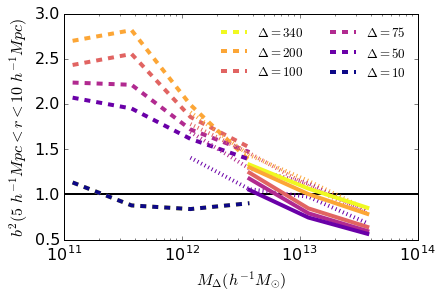

In [30]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

colord340 = cm.plasma(1.)
colord200 = cm.plasma(0.8)
colord100 = cm.plasma(0.6)
colord75 = cm.plasma(0.40)
colord50 = cm.plasma(0.2)
colord10 = cm.plasma(0.0)

plt.axhline(y=1.0, color='k', linewidth=2)

plt.semilogx(10**mass_l0125, bias_l0125_d10, color=colord340, linestyle='--', linewidth=4, label=r'$\Delta = 340$')
plt.semilogx(10**mass_l0125, bias_l0125_d200, color=colord200, linestyle='--', linewidth=4, label=r'$\Delta = 200$')
plt.semilogx(10**mass_l0125, bias_l0125_d100, color=colord100, linestyle='--', linewidth=4, label=r'$\Delta = 100$')
plt.semilogx(10**mass_l0125, bias_l0125_d75, color=colord75, linestyle='--', linewidth=4, label=r'$\Delta = 75$')
plt.semilogx(10**mass_l0125, bias_l0125_d50, color=colord50, linestyle='--', linewidth=4, label=r'$\Delta = 50$')
plt.semilogx(10**mass_l0125, bias_l0125_d10, color=colord10, linestyle='--', linewidth=4, label=r'$\Delta = 10$')

plt.semilogx(10**mass_l0250, bias_l0250_d200, color=colord200, linestyle=':', linewidth=4)
plt.semilogx(10**mass_l0250, bias_l0250_d100, color=colord100, linestyle=':', linewidth=4)
plt.semilogx(10**mass_l0250, bias_l0250_d75, color=colord75, linestyle=':', linewidth=4)
plt.semilogx(10**mass_l0250, bias_l0250_d50, color=colord50, linestyle=':', linewidth=4)

plt.semilogx(10**mass_l0500, bias_l0500_d340, color=colord340, linestyle='-', linewidth=4)
plt.semilogx(10**mass_l0500, bias_l0500_d200, color=colord200, linestyle='-', linewidth=4)
plt.semilogx(10**mass_l0500, bias_l0500_d100, color=colord100, linestyle='-', linewidth=4)
plt.semilogx(10**mass_l0500, bias_l0500_d75, color=colord75, linestyle='-', linewidth=4)
plt.semilogx(10**mass_l0500, bias_l0500_d50, color=colord50, linestyle='-', linewidth=4)

plt.xlabel(r'$M_{\Delta} (h^{-1}M_{\odot})$')
plt.ylabel(r'$b^2 (5 \ h^{-1}Mpc < r < 10\  h^{-1}Mpc)$')
plt.legend(loc='upper right', numpoints=1, frameon=False, prop={'size':13}, ncol=2)

plt.tight_layout(pad=0.1)
plt.savefig('biasplot.pdf')